# Dominik Czech - Lab 1 - EDA (python, pandas, numpy, sklearn, matplotlib, seaborn, scipy stats)


In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np


## Import the dataset

In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets
  
df = pd.concat([X,y], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Distribution of the Target Variable

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


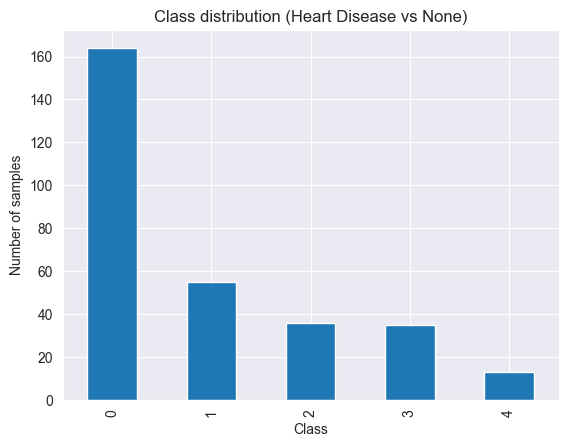

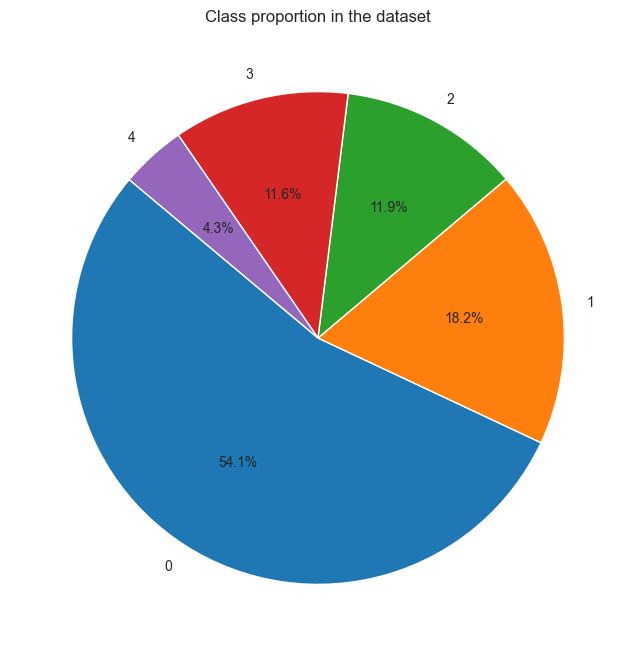

In [3]:
print(df['num'].value_counts())
df['num'].value_counts().plot(kind='bar', title='Class distribution (Heart Disease vs None)')
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()

#Generated by Gemini 2.5 Pro
class_counts = df['num'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class proportion in the dataset')
plt.ylabel('')
plt.show()

### Key takeaways
- The dataset is **unbalanced**. Class '0' representing the lack of Heart Disease ~54% of the dataset, while the remaining 46% are split into the classes representing the Heart Diseases.
- The distribution of Heart Disease stages is **uneven**. (e.g., Class 1 is 4 times more common than 4).
- **Imbalance** of the dataset **might negatively affect** the model's ability to accurately diagnose **less frequent stages** of Heart Disease.

## Numerical variables

In [4]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [5]:
df[num_cols].describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


### Key takeaways
- **ca** is likely a discrete numerical column (countable, with possible values being 0, 1, 2 and 3)

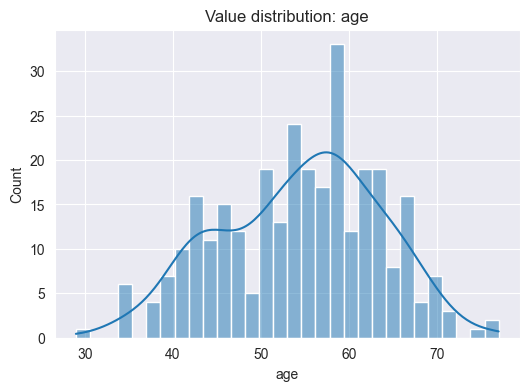

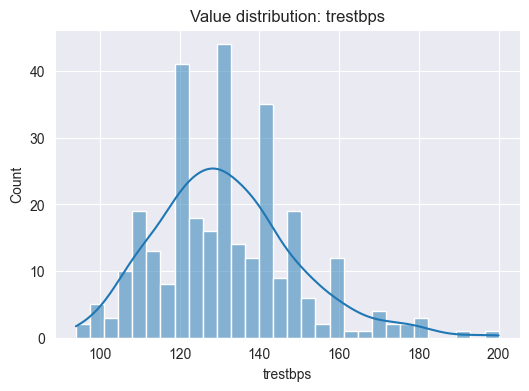

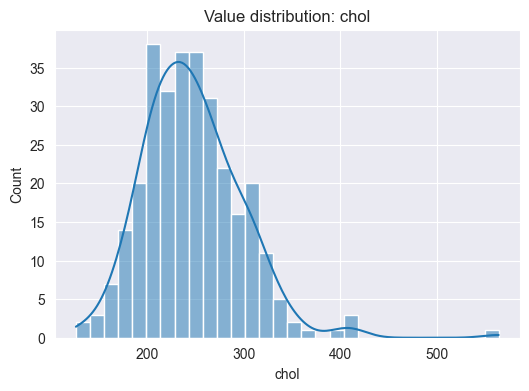

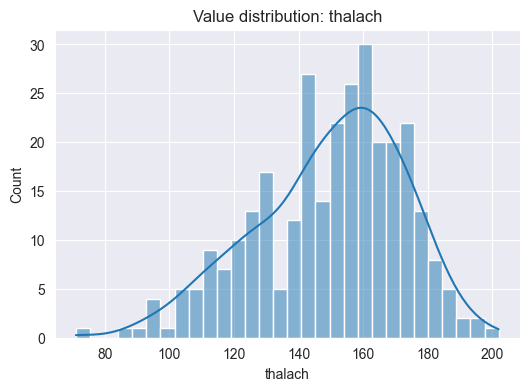

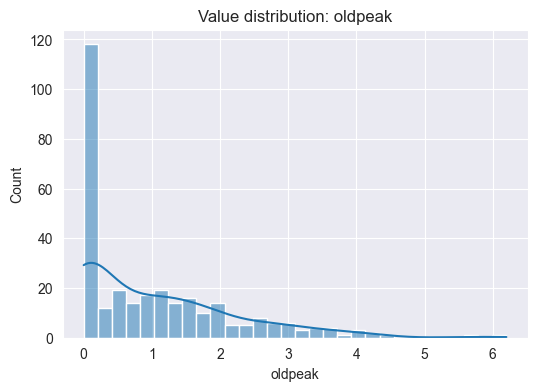

In [6]:
num_cols.remove('ca') # discrete column (values 0, 1, 2, 3)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Value distribution: {col}")
    plt.show()



In [7]:
# Generated by Gemini 2.5 Pro

print("Shapiro-Wilk Test Results:")
for feature in num_cols:
    stat, p_value = shapiro(df[feature].dropna()) # drop missing values if any
    print(f'Feature: {feature}, P-value: {p_value:.4f}')
    if p_value > 0.05:
        print(f"  -> Distribution of '{feature}' may be normal.\n")
    else:
        print(f"  -> Distribution of '{feature}' is likely not normal.\n")

Shapiro-Wilk Test Results:
Feature: age, P-value: 0.0061
  -> Distribution of 'age' is likely not normal.

Feature: trestbps, P-value: 0.0000
  -> Distribution of 'trestbps' is likely not normal.

Feature: chol, P-value: 0.0000
  -> Distribution of 'chol' is likely not normal.

Feature: thalach, P-value: 0.0001
  -> Distribution of 'thalach' is likely not normal.

Feature: oldpeak, P-value: 0.0000
  -> Distribution of 'oldpeak' is likely not normal.



### Key takeaways:
- Although the histograms of most of the columns might have suggested that at least some of the features approach the normal distribution, the **p-value of the Shapiro-Wilk Test** for each of the features was **close to zero**. This indicates the presence of **skewness** and potential **outliers**.

### Ca - Discrete value

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


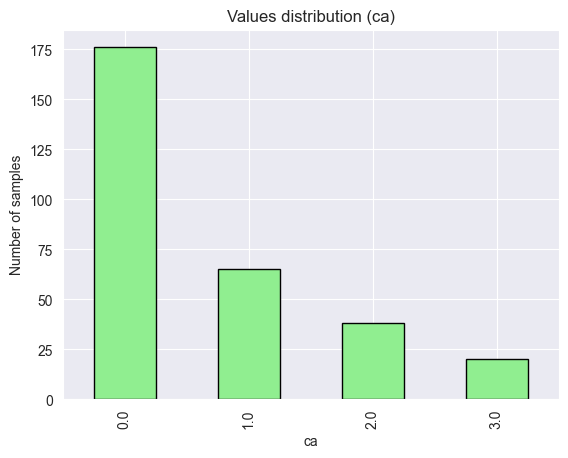

In [8]:
counts = df['ca'].value_counts().sort_index()  # 0,1,2,3

print(counts)

counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Values distribution (ca)")
plt.xlabel("ca")
plt.ylabel("Number of samples")
plt.show()


### Key takeaways
- The distribution of **ca** follows a **pattern** of **exponential decay**, where the number of patients with each step of severity is about 50% of the previous one.
- Since the distribution is **heavily unbalanced**, the model might **end up undertrained** on the rarest cases.

## Categorical features

In [9]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

sex: sex
0     97
1    206
Name: count, dtype: int64


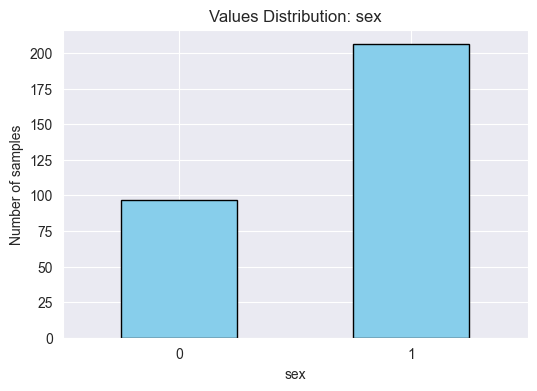

cp: cp
1     23
2     50
3     86
4    144
Name: count, dtype: int64


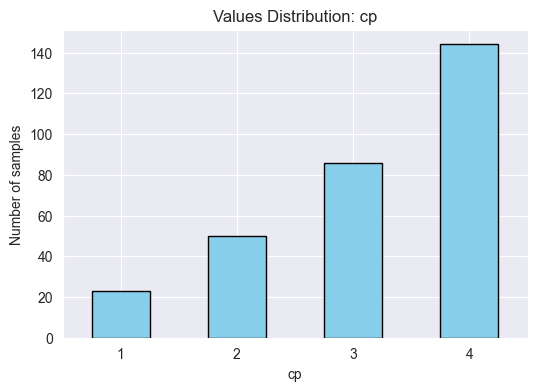

fbs: fbs
0    258
1     45
Name: count, dtype: int64


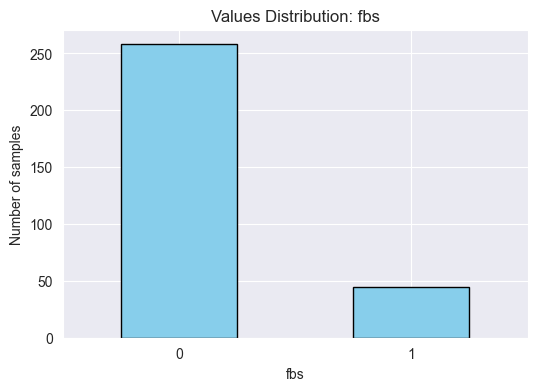

restecg: restecg
0    151
1      4
2    148
Name: count, dtype: int64


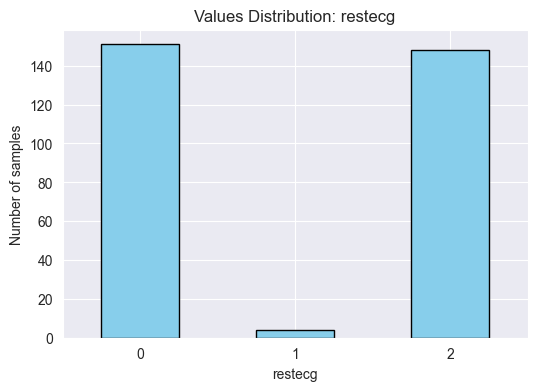

exang: exang
0    204
1     99
Name: count, dtype: int64


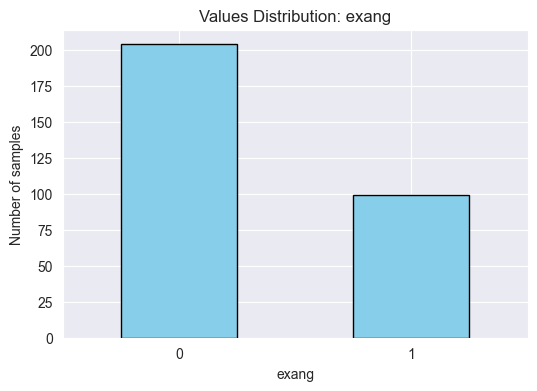

slope: slope
1    142
2    140
3     21
Name: count, dtype: int64


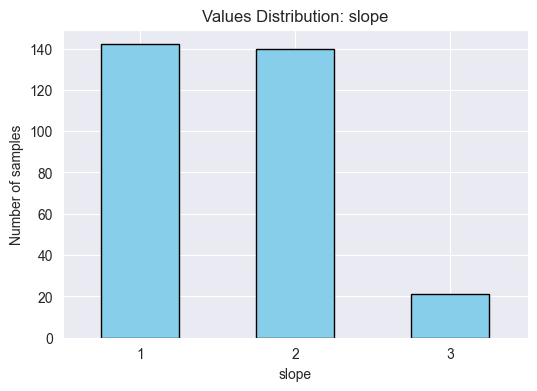

thal: thal
3.0    166
6.0     18
7.0    117
Name: count, dtype: int64


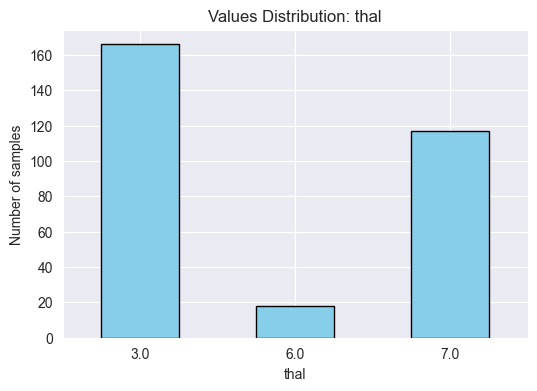

In [10]:
for col in cat_features:
    counts = df[col].value_counts().sort_index()
    
    print(f"{col}: {counts}")
    
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Values Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Number of samples")
    plt.xticks(rotation=0)
    plt.show()


### Key takeaways:
- **sex** - Dataset is heavily skewed towards male patients, with an approx. 2:1 ratio. Any predictions made by the model might be more representative for males than females.
- **cp** - Clear ordinal imbalance - category '4' is over 6 times more frequent than category '1'. This suggests the dataset is **focused on patients who are already experiencing symptoms** such as chest pain.
- **fbs** - Heavily skewed towards patients without high levels of sugar (85%). Model will have less data to learn the patterns associated with high levels of sugar.
- **restecg** - Classes '0' and '2' seem to be perfectly balanced (151:148), while class '1' is appearing only '4' times. The model will struggle to learn anything from this class and might even ignore it.
- **exang** - Similar ratio to **sex**, might suggest undertraining for patients with angina during exercises.
- **slope** - Similar situation to **restecg**, classes '1' and '2' are nearly uniform (142:140), while class '3' is underrepresented.
- **thal** - Similar to **slope** and **restecg**, Class '6.0' is underrepresented.

## Missing values

In [11]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing)

ca      4
thal    2
dtype: int64


In [12]:
print(df['ca'].value_counts())

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


In [13]:
print(df['thal'].value_counts())

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64


### Missing values analysis
In 303 rows the dataset contains only **6** missing features. Standard imputation methods are **unlikely to distort the data patterns**.

### Proposed imputation
- **ca** is a **discrete, numerical value**, therefore we can impute the missing values as the **median** of the distribution. Alternatively the **mode** of the set could be used, as the distribution seems to be highly skewed towards the left side and there is only 2 rows with missing data.
- **thal** is a categorical feature, therefore we can impute the missing values using the **mode**, since there are only 4 rows with missing data. Another option would be to mark them as **missing**, if the number of missing rows was greater. **Median** is not a valid option, as it could end up in the **minority class** of 6.0, causing model to hallucinate.

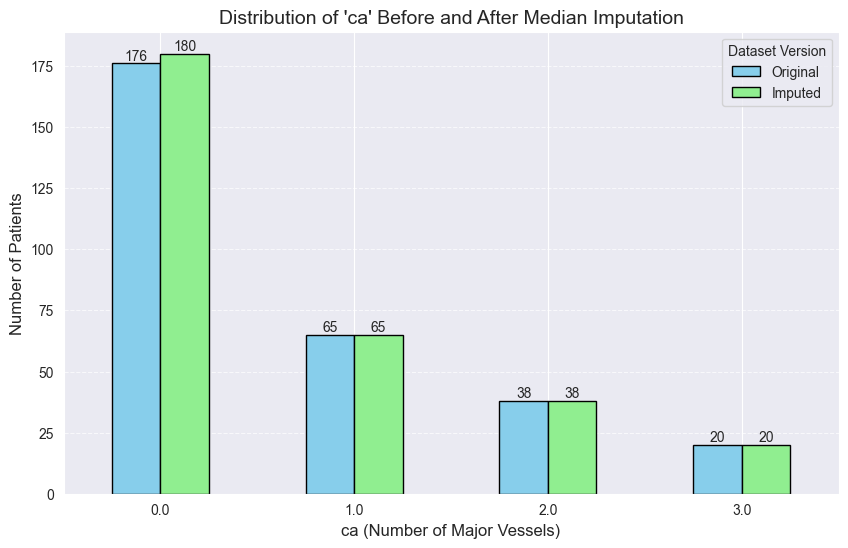

In [14]:
ca_filled = df['ca'].fillna(df['ca'].median())

## Generated by Gemini 2.5 Pro

# 1. Calculate counts for the original data (before imputation)
original_counts = df['ca'].value_counts().sort_index()

# 2. Calculate counts for the imputed data (after imputation)
imputed_counts = ca_filled.value_counts().sort_index()

# 3. Combine into a single DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Original': original_counts,
    'Imputed': imputed_counts
})


# --- Plotting ---
ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'], edgecolor='black')

plt.title("Distribution of 'ca' Before and After Median Imputation", fontsize=14)
plt.xlabel("ca (Number of Major Vessels)", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(rotation=0) # Keep the x-axis labels horizontal
plt.legend(title="Dataset Version")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on top of each bar for clarity
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

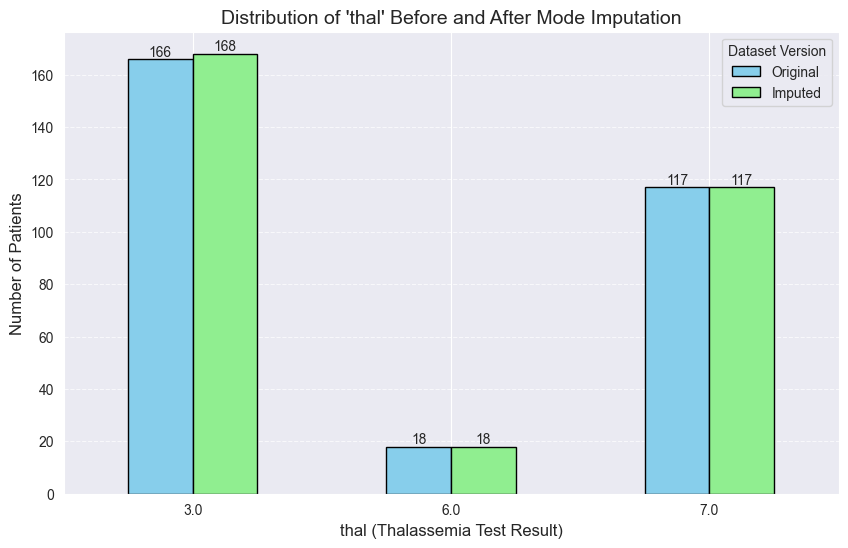

In [15]:
thal_filled = df['thal'].fillna(df['thal'].mode()[0])

# Generated by Gemini 2.5 Pro

# 1. Calculate counts for the original data (before imputation)
original_counts = df['thal'].value_counts().sort_index()

# 2. Calculate counts for the imputed data (after imputation with mode)
imputed_counts = thal_filled.value_counts().sort_index()

# 3. Combine into a single DataFrame for easy plotting
comparison_df = pd.DataFrame({
    'Original': original_counts,
    'Imputed': imputed_counts
})


# --- Plotting ---
ax = comparison_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'], edgecolor='black')

plt.title("Distribution of 'thal' Before and After Mode Imputation", fontsize=14)
plt.xlabel("thal (Thalassemia Test Result)", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(rotation=0) # Keep the x-axis labels horizontal
plt.legend(title="Dataset Version")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on top of each bar for clarity
for p in ax.patches:
    # Check if height is > 0 to avoid annotating non-existent bars (like NaN)
    if p.get_height() > 0:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


### Key takeaways
- Imputation methods: **median** for **ca** and **mode** for **thal** do not severly affect the distribution of the feature values in the dataset (the dataset mantains data integrity and the risk of distorting the data paterns is small).
- For small dataset of 303 records **imputation is much safer than dropping rows**.

## Matrix transformation

In [23]:
#Generated by Gemini 2.5 Pro

# --- 1. Prepare the final DataFrame ---

# Start with a fresh copy of the original dataframe
df_processed = df.copy()

# Impute missing values using the strategies we decided on
df_processed['ca'] = df_processed['ca'].fillna(df_processed['ca'].median())
df_processed['thal'] = df_processed['thal'].fillna(df_processed['thal'].mode()[0])

# --- 2. Separate Features (X) and Target (y) ---

# The 'num' column is our target variable (what we want to predict)
X = df_processed.drop('num', axis=1)
y = df_processed['num']

# --- 3. Define Column Types ---

# Identify which columns are categorical and which are numerical
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# --- 4. Create the Preprocessing Pipeline ---

# Create a transformer for numerical features: scale them
numerical_transformer = StandardScaler()

# Create a transformer for categorical features: one-hot encode them
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Use ColumnTransformer to apply the correct transformer to each column type
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# --- 5. Apply the Transformations ---

# The preprocessor is now ready to transform the data
X_processed = preprocessor.fit_transform(X)


# --- 6. Display Results ---
print("Shape of the final numerical feature matrix (samples x features):")
print(X_processed.shape)
print("\nFirst 5 rows of the processed matrix:")
# Using np.round to make the output easier to read
print(np.round(X_processed[:5], 2))

Shape of the final numerical feature matrix (samples x features):
(303, 25)

First 5 rows of the processed matrix:
[[ 0.95  0.76 -0.26  0.02  1.09 -0.71  0.    1.    1.    0.    0.    0.
   0.    1.    0.    0.    1.    1.    0.    0.    0.    1.    0.    1.
   0.  ]
 [ 1.39  1.61  0.76 -1.82  0.4   2.5   0.    1.    0.    0.    0.    1.
   1.    0.    0.    0.    1.    0.    1.    0.    1.    0.    1.    0.
   0.  ]
 [ 1.39 -0.67 -0.34 -0.9   1.35  1.43  0.    1.    0.    0.    0.    1.
   1.    0.    0.    0.    1.    0.    1.    0.    1.    0.    0.    0.
   1.  ]
 [-1.93 -0.1   0.06  1.64  2.12 -0.71  0.    1.    0.    0.    1.    0.
   1.    0.    1.    0.    0.    1.    0.    0.    0.    1.    1.    0.
   0.  ]
 [-1.49 -0.1  -0.83  0.98  0.31 -0.71  1.    0.    0.    1.    0.    0.
   1.    0.    0.    0.    1.    1.    0.    1.    0.    0.    1.    0.
   0.  ]]
